## ME40: Dimensional & Data Analyses in Engineering
### HW 4 - Monday November 3rd, 2025
#### Marissa Till

### Problem 2 - Wind farm measurements
##### (This was done in Python rather than MATLAB)

The data for this problem consists of the three components of the wind velocity (in 𝑚/𝑠) measured using an anemometer at a Caltech-associated wind farm run by Prof. Dabiri. 𝑁 = 72,000 measurements were made at a rate of 10 Hz, i.e. over a two-hour period. The data is provided as a separate file in CSV format. The columns are 𝑢𝑥 , 𝑢𝑦, 𝑢𝑧.

In [1]:
# === Import Required Packages ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### First, we want to “visualize” these measurements.

1. Plot the 𝑢𝑥 component of velocity over the entire time span (i.e. 2ℎ).
Note: Make sure to label your axis properly. Make sure the time range is correct.

In [2]:
# === Load Data ===

# Define the path to the CSV file containing velocity data
filepath = '/Users/marissatill/Downloads/junior year/fall/me40/sets/week 5/HW4.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(filepath)

# Extract columns for the velocity components
ux = df.columns[0]  # Ux: velocity component in x-direction
uy = df.columns[1]  # Uy: velocity component in y-direction
uz = df.columns[2]  # Uz: velocity component in z-direction

# Create an array of time steps based on the number of samples
time_steps = np.arange(0, df.shape[0], 1)

print("Dataframe Shape:", df.shape)  # Number of samples, number of components

Dataframe Shape: (71999, 3)


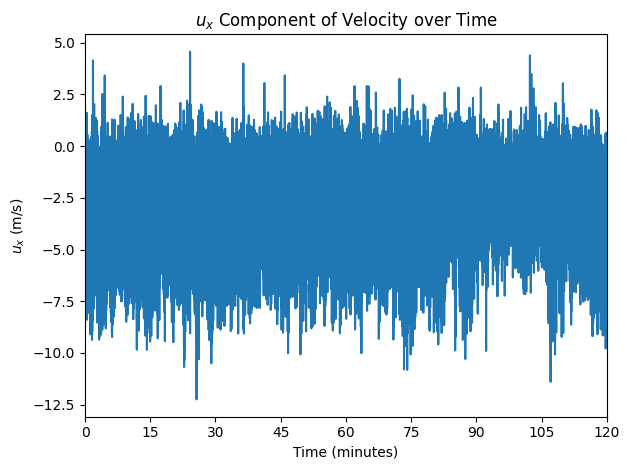

In [3]:
# === Plot the 𝑢𝑥 component of velocity over the entire time span ===

# Generate 9 tick marks spaced evenly through the time range (2 hrs) (every 15 mins)
tick_indices_x = np.linspace(0, len(time_steps) - 1, 9, dtype=int)
tick_locs_x = [time_steps[i] for i in tick_indices_x]    # Tick positions
tick_labels_x = [round(t/(10*60)) for t in tick_locs_x]  # Tick labels (minutes)

plt.figure()
plt.plot(time_steps, df[ux])                         # Plot the data
plt.title(r'$u_x$ Component of Velocity over Time')  # Set the title
plt.xlabel('Time (minutes)')                         # Label x-axis
plt.ylabel(r'$u_x$ (m/s)')                           # Label y-axis
plt.xticks(tick_locs_x, tick_labels_x)               # Customize x-ticks
plt.xlim(time_steps[0], time_steps[-1])              # Set x-axis limits
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()          # Display the plot

2. Repeat the previous question over the first 2min and the first 10𝑠.

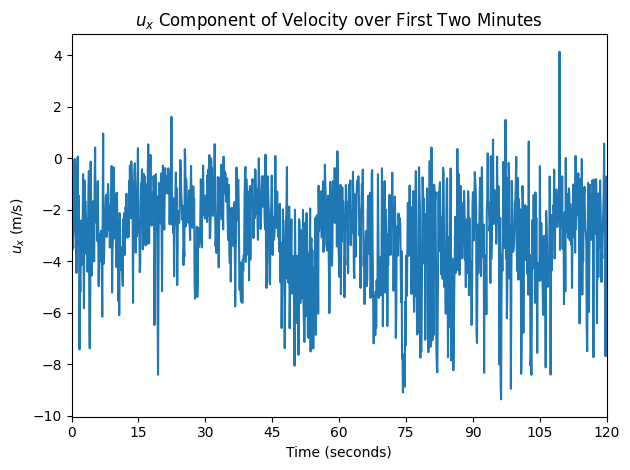

In [4]:
# === Plot the 𝑢𝑥 component of velocity over the first 2 minutes ===

# Define duration: 2 minutes of data at 10 samples per second
two_minutes = 10 * 60 * 2  # 10 samples/sec × 60 sec/min × 2 min = 1200 samples
first_two_minutes = time_steps[:two_minutes]  # Extract time steps for first 2 mins

# Generate 9 tick marks across the 2-minute range (every 15 seconds)
tick_indices_x = np.linspace(0, len(first_two_minutes) - 1, 9, dtype=int)
tick_locs_x = [first_two_minutes[i] for i in tick_indices_x]  # Tick positions
tick_labels_x = [round(t / 10) for t in tick_locs_x]          # Tick labels (seconds)

# Return 𝑢𝑥 over first 2 minutes
ux_2min = df[ux][:two_minutes]

plt.figure()
plt.plot(first_two_minutes, ux_2min)                              # Plot the data
plt.title(r'$u_x$ Component of Velocity over First Two Minutes')  # Set the title
plt.xlabel('Time (seconds)')                                      # Label x-axis
plt.ylabel(r'$u_x$ (m/s)')                                        # Label y-axis
plt.xticks(tick_locs_x, tick_labels_x)                            # Customize x-ticks
plt.xlim(first_two_minutes[0], first_two_minutes[-1])             # Set x-axis limits
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()          # Display the plot

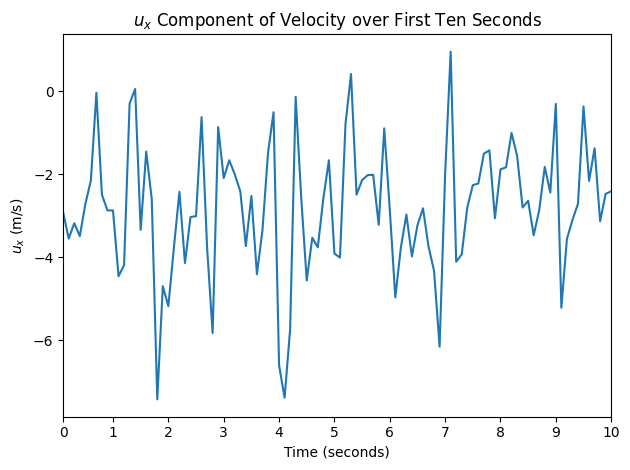

In [5]:
# === Plot the 𝑢𝑥 component of velocity over the first 10 seconds ===

# Define duration: 10 seconds of data at 10 samples per second
ten_seconds = 10 * 10  # 10 samples/sed × 10s = 100 samples
first_10s = time_steps[:ten_seconds]  # Extract time steps for the first 10 seconds

# Generate 11 tick marks across the 10-second range (every 1 second)
tick_indices_x = np.linspace(0, len(first_10s) - 1, 11, dtype=int)
tick_locs_x = [first_10s[i] for i in tick_indices_x]  # Tick positions
tick_labels_x = [round(t / 10) for t in tick_locs_x]  # Tick labels in seconds

# Return 𝑢𝑥 over first 10 seconds
ux_10s = df[ux][:ten_seconds]

plt.figure()
plt.plot(first_10s, ux_10s)                                       # Plot the data
plt.title(r'$u_x$ Component of Velocity over First Ten Seconds')  # Set the title
plt.xlabel('Time (seconds)')                                      # Label x-axis
plt.ylabel(r'$u_x$ (m/s)')                                        # Label y-axis
plt.xticks(tick_locs_x, tick_labels_x)                            # Customize x-ticks
plt.xlim(first_10s[0], first_10s[-1])                             # Set x-axis limits
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()          # Display the plot

#### We want to evaluate a few key statistical quantities using Python.

3. Compute the minimum and maximum of the 𝑢𝑥, 𝑢𝑦, and 𝑢𝑧 velocity components.
4. Compute the sample mean 𝑢𝑥, 𝑢𝑦, and 𝑢𝑧 velocity components.
5. Compute the sample variance of the 𝑢𝑥, 𝑢𝑦, and 𝑢𝑧 velocity components.

Note: For the previous questions, do not use the mean or var functions in Python. Write them yourself. You may use the min and max functions, though.

In [6]:
# === Compute the minimum and maximum of the 𝑢𝑥, 𝑢𝑦, and 𝑢𝑧 velocity components ===

# Compute the minimums
min_ux = df[ux].min()
min_uy = df[uy].min()
min_uz = df[uz].min()

# Compute the maximums
max_ux = df[ux].max()
max_uy = df[uy].max()
max_uz = df[uz].max()

# Print the results
print(f'u_x\n  Minimum Value: {min_ux} m/s\n  Maximum Value: {max_ux} m/s')
print(f'u_y\n  Minimum Value: {min_uy} m/s\n  Maximum Value: {max_uy} m/s')
print(f'u_z\n  Minimum Value: {min_uz} m/s\n  Maximum Value: {max_uz} m/s')

u_x
  Minimum Value: -12.24 m/s
  Maximum Value: 4.56 m/s
u_y
  Minimum Value: -2.28 m/s
  Maximum Value: 11.18 m/s
u_z
  Minimum Value: -4.88 m/s
  Maximum Value: 4.55 m/s


In [7]:
# === Compute the sample mean of the 𝑢𝑥, 𝑢𝑦, and 𝑢𝑧 velocity components ===

# Define a function to compute the sample mean
def sample_mean(sample):
    sample_sum = 0                   # Initialize variable to hold cumulative sum
    for s in sample:                 # Iterate through each value in the sample
        sample_sum += float(s)       # Convert to float and add to the cumulative sum
    mean = sample_sum / len(sample)  # Calculate the mean: total sum/# of elements
    return mean                      # Return the computed mean

# Compute the sample means
ux_mean = sample_mean(df[ux])
uy_mean = sample_mean(df[uy])
uz_mean = sample_mean(df[uz])

# Print the results
print("Sample Mean Value:")
print(f'  u_x: {ux_mean:.2f} m/s')
print(f'  u_y:  {uy_mean:.2f} m/s')
print(f'  u_z:  {uz_mean:.2f} m/s')

Sample Mean Value:
  u_x: -2.78 m/s
  u_y:  3.00 m/s
  u_z:  0.02 m/s


In [8]:
# === Compute the sample variance of the 𝑢𝑥, 𝑢𝑦, and 𝑢𝑧 velocity components ===

# Define a function to compute the sample variance
def sample_variance(sample):
    mean = sample_mean(sample)  # Compute the mean of the sample
    cumulative_sum = 0          # Initialize variable to hold computed value

    # Compute squared difference from the mean and add to the sum for each sample
    for s in sample:
        cumulative_sum += (float(s) - mean)**2

    # Calculate sample variance: sum of squares / (n - 1)
    variance = cumulative_sum / (len(sample) - 1)
    return variance

# Compute the sample variances
ux_var = sample_variance(df[ux])
uy_var = sample_variance(df[uy])
uz_var = sample_variance(df[uz])

# Print the results
print("Sample Variance Value:")
print(f'  u_x: {ux_var:.2f} m/s')
print(f'  u_y: {uy_var:.2f} m/s')
print(f'  u_z: {uz_var:.2f} m/s')

Sample Variance Value:
  u_x: 3.01 m/s
  u_y: 2.81 m/s
  u_z: 1.28 m/s


#### Now, let’s try to estimate the probability density function of these three random variables.

6. To estimate the PDF: “bin” the 𝑁 samples into 100 equidistantly spaced intervals (aka bins) between the min and max of the random variable. Plot your results. Repeat for each velocity component.

Note: Make sure to add a legend and axis labels.

Note: You cannot use any of the built-in histogram functions in MATLAB.

7. Superimpose (on these figures) the PDF you would get if the variables were Gaussian-distributed.

Note: If the curves are way off, review how you did Q6 and Q7.

Note: It is ok to submit a single plot for 𝑢𝑥 combining Q6 and Q7. Same for 𝑢𝑦 and 𝑢𝑧.

In [9]:
# === “Bin” the 𝑁 samples into 100 equidistantly spaced intervals ===

# Create function to bin between the min and max of the random variable
def bin_random_var(sample, n_bins=100):
    # Initialize dictionary to store samples for each bin index
    bins = {i: [] for i in range(n_bins)}

    # Compute bin boundaries between the sample min and max
    bin_bounds = np.linspace(sample.min(), sample.max(), n_bins + 1)

    # Compute the bin centers
    bin_centers = (bin_bounds[:-1] + bin_bounds[1:]) / 2

    # Assign each sample to its appropriate bin
    for s in sample:
        for i in range(n_bins):
            # Append sample if it lies within the current bin range
            # Include the rightmost bound only for the last bin to catch sample.max()
            if (bin_bounds[i] <= s < bin_bounds[i + 1]
                    or (i == n_bins - 1 and s == bin_bounds[-1])):
                bins[i].append(s)
                break  # Stop checking once bin found

    # Verify all samples were binned
    total_values = sum(len(v) for v in bins.values())
    num_unbinned = len(sample) - total_values

    # Raise an error if any samples were missed
    if num_unbinned != 0:
        raise ValueError(f"{num_unbinned} samples were not assigned to any bin.")

    return bins, bin_bounds, bin_centers

#### Calculate Gaussian Distribution

$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} \bigl({\frac{x-\mu}{\sigma}}\bigr)^2}$ with variance = $\sqrt{\sigma}$

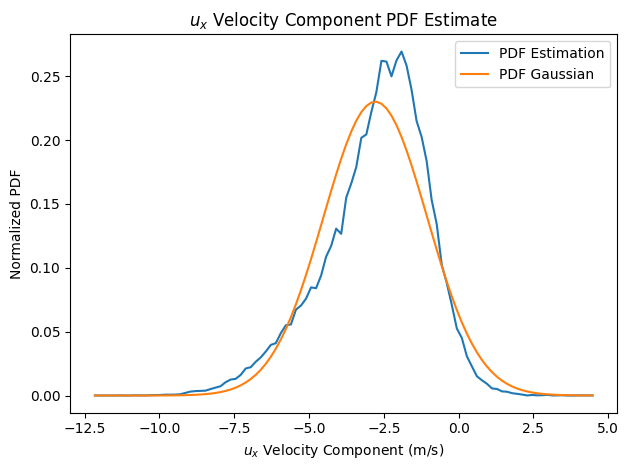

In [10]:
# === Estimate the PDF and Superimpose the Gaussian-Distributed PDF for 𝑢𝑥===

# 'Bin' the sample
bins, bin_bounds, bin_centers = bin_random_var(df[ux])

# Count how many samples are in each bin
bin_counts = [len(bins[i]) for i in range(len(bins))]

# Normalize (area under curve = 1)
dx = bin_centers[1] - bin_centers[0]
pdf_estimate = bin_counts / (np.sum(bin_counts) * dx)

# Compute the Gaussian-Distributed PDF for 𝑢𝑥
mean = sample_mean(df[ux])
var  = sample_variance(df[ux])
pdf_gaussian = (1 / np.sqrt(2 * np.pi * var)) * np.exp(-1/2 * ((bin_centers - mean)**2) / var)  # Calculate value for each bin center

# Plot the results
plt.plot(bin_centers, pdf_estimate, label='PDF Estimation')  # Plot the Estimated PDF
plt.plot(bin_centers, pdf_gaussian, label='PDF Gaussian')     # Plot the Gaussian-Distribute PDF
plt.title(r'$u_x$ Velocity Component PDF Estimate')           # Set the title
plt.xlabel(r'$u_x$ Velocity Component (m/s)')                 # Label x-axis
plt.ylabel('Normalized PDF')                                  # Label y-axis
plt.legend()        # Plot legend
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()          # Display the plot

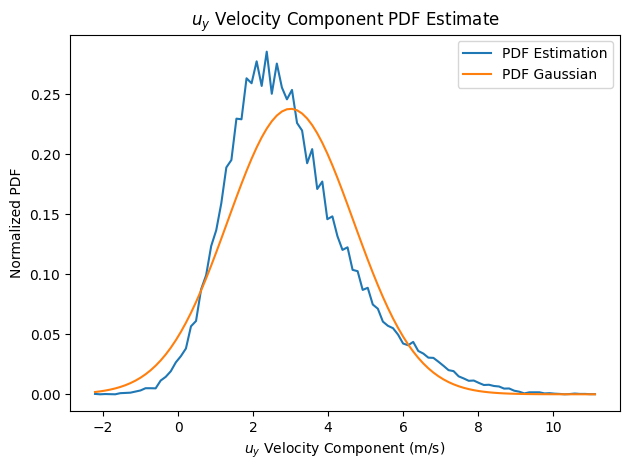

In [11]:
# === Estimate the PDF and Superimpose the Gaussian-Distributed PDF for 𝑢𝑦 ===

# 'Bin' the sample
bins, bin_bounds, bin_centers = bin_random_var(df[uy])

# Count how many samples are in each bin
bin_counts = [len(bins[i]) for i in range(len(bins))]

# Normalize (area under curve = 1)
dx = bin_centers[1] - bin_centers[0]
pdf_estimate = bin_counts / (np.sum(bin_counts) * dx)

# Compute the Gaussian-Distributed PDF for 𝑢𝑦
mean = sample_mean(df[uy])
var  = sample_variance(df[uy])
pdf_gaussian = (1 / np.sqrt(2 * np.pi * var)) * np.exp(-1/2 * ((bin_centers - mean)**2) / var)  # Calculate value for each bin center

# Plot the results
plt.plot(bin_centers, pdf_estimate, label='PDF Estimation')   # Plot the Estimated PDF
plt.plot(bin_centers, pdf_gaussian, label='PDF Gaussian')     # Plot the Gaussian-Distribute PDF
plt.title(r'$u_y$ Velocity Component PDF Estimate')           # Set the title
plt.xlabel(r'$u_y$ Velocity Component (m/s)')                 # Label x-axis
plt.ylabel('Normalized PDF')                                  # Label y-axis
plt.legend()        # Plot legend
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()          # Display the plot

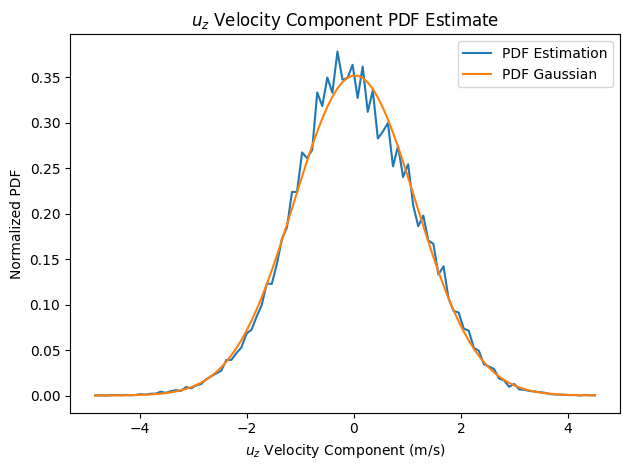

In [12]:
# === Estimate the PDF and Superimpose the Gaussian-Distributed PDF for 𝑢𝑧 ===

# 'Bin' the sample
bins, bin_bounds, bin_centers = bin_random_var(df[uz])

# Count how many samples are in each bin
bin_counts = [len(bins[i]) for i in range(len(bins))]

# Normalize (area under curve = 1)
dx = bin_centers[1] - bin_centers[0]
pdf_estimate = bin_counts / (np.sum(bin_counts) * dx)

# Compute the Gaussian-Distributed PDF for 𝑢𝑧
mean = sample_mean(df[uz])
var  = sample_variance(df[uz])
pdf_gaussian = (1 / np.sqrt(2 * np.pi * var)) * np.exp(-1/2 * ((bin_centers - mean)**2) / var)  # Calculate value for each bin center

# Plot the results
plt.plot(bin_centers, pdf_estimate, label='PDF Estimation')   # Plot the Estimated PDF
plt.plot(bin_centers, pdf_gaussian, label='PDF Gaussian')     # Plot the Gaussian-Distribute PDF
plt.title(r'$u_z$ Velocity Component PDF Estimate')           # Set the title
plt.xlabel(r'$u_z$ Velocity Component (m/s)')                 # Label x-axis
plt.ylabel('Normalized PDF')                                  # Label y-axis
plt.legend()        # Plot legend
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()          # Display the plot

#### It is time to evaluate some confidence intervals.

8. Assume that all samples are iid. Consider that you take a subset of 𝑚 = 50 samples from the full dataset and you compute its sample mean. What interval do you expect this sample mean to fall in with 95% certainty? Repeat for each component.

In [13]:
# === Calculate the Confidence Interval for the Mean===

def confidence_interval(sample, m=50):  # Subset of 𝑚=50 samples
    mean = sample_mean(sample)
    var = sample_variance(sample)

    # 95% Confidence Interval for the sample mean when taking subsets of size m
    ci = (mean - 1.96 * np.sqrt(var / m), mean + 1.96 * np.sqrt(var / m))

    return ci[0], ci[1]

# Calculate the lower and upper confidence intervals
ux_ci_lower, ux_ci_upper = confidence_interval(df[ux])
uy_ci_lower, uy_ci_upper = confidence_interval(df[uy])
uz_ci_lower, uz_ci_upper = confidence_interval(df[uz])

# Print the results
print("95% Confidence Interval for the Mean (m=50):")
print(f"  u_x: [{ux_ci_lower:.2f}, {ux_ci_upper:.2f}] (m/s)")
print(f"  u_y: [{uy_ci_lower:.2f},   {uy_ci_upper:.2f}] (m/s)")
print(f"  u_z: [{uz_ci_lower:.2f},  {uz_ci_upper:.2f}] (m/s)")

95% Confidence Interval for the Mean (m=50):
  u_x: [-3.27, -2.30] (m/s)
  u_y: [2.53,   3.46] (m/s)
  u_z: [-0.29,  0.33] (m/s)


9. Use the first 𝑚 = 50 samples of the full dataset to evaluate the above sample mean. Does it fall in the interval? If not, what do you think the reason is? Repeat for each component.

In [14]:
# === First 𝑚 = 50 mean sample ===

m = 50  # Define m
ux_first_50 = sample_mean(df[ux][:m])  # Return sample mean of first 50 𝑢𝑥 samples
uy_first_50 = sample_mean(df[uy][:m])  # Return sample mean of first 50 𝑢𝑦 samples
uz_first_50 = sample_mean(df[uz][:m])  # Return sample mean of first 50 𝑢𝑧 samples

# Print results
print("Mean of the first 𝑚 = 50 samples:")
print(f"  u_x: {ux_first_50:.2f} m/s")
print(f"  u_y:  {uy_first_50:.2f} m/s ← Outside of the Confidence Interval")
print(f"  u_z:  {uz_first_50:.2f} m/s")

Mean of the first 𝑚 = 50 samples:
  u_x: -3.08 m/s
  u_y:  3.98 m/s ← Outside of the Confidence Interval
  u_z:  0.13 m/s


The 𝑢𝑦 velocity component is the only 𝑚 = 50 sample mean that falls outside the confidence interval.

This is because the samples are correlated rather than not independent and identically distributed (iid).